In [2]:
# importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [ ]:
# filtering data
df_DA = df[((df['job_title_short'] == 'Data Analyst') | (df['job_title_short'] == 'Senior Data Analyst'))&(df['job_country']=='Poland')].copy()



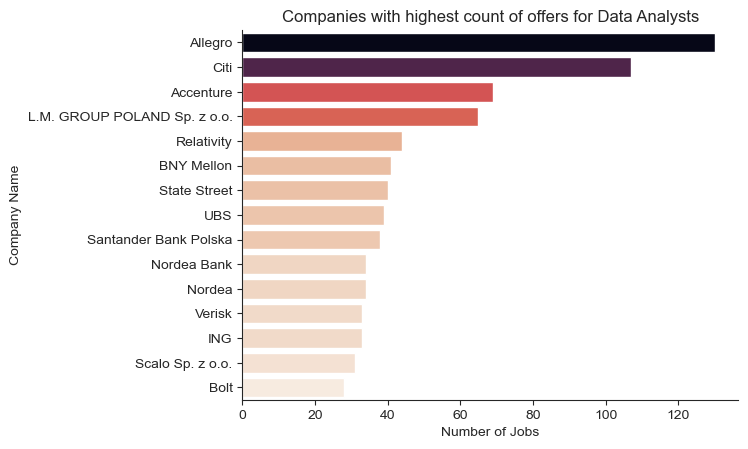

In [27]:
df_plot = df_DA['company_name'].value_counts().head(15).to_frame().copy()

sns.set_style(style='ticks')
sns.barplot(data=df_plot, y='company_name',x='count',hue = 'count',palette='rocket_r' ,legend=False)
sns.despine()
plt.title('Companies with highest count of offers for Data Analysts')
plt.ylabel('Company Name')
plt.xlabel('Number of Jobs')
plt.show()

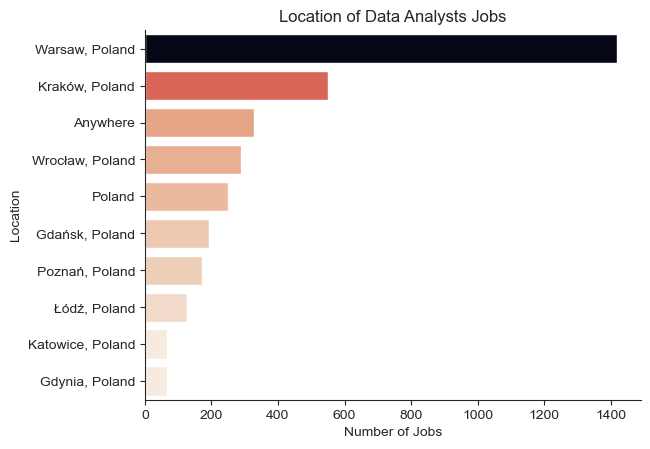

In [42]:
df_plot2 = df_DA['job_location'].value_counts().head(10).to_frame().copy()

sns.barplot(data=df_plot2, y='job_location',x='count',hue = 'count',palette='rocket_r' ,legend=False)
sns.despine()
plt.title('Location of Data Analysts Jobs')
plt.ylabel('Location')
plt.xlabel('Number of Jobs')
plt.show()

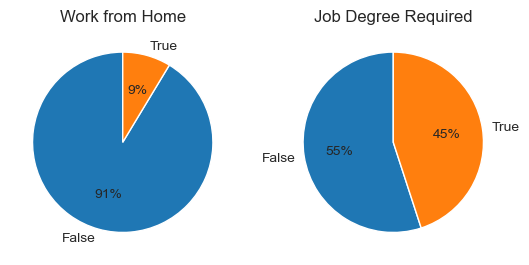

In [41]:
fig, ax = plt.subplots(1,2)

dict_column = {
    'job_work_from_home':'Work from Home',
    'job_no_degree_mention': 'Job Degree Required',
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA[column].value_counts(), startangle = 90, autopct="%.0f%%", labels= ('False','True'))
    ax[i].set_title(title)

plt.show()